In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

In [3]:
import cufflinks as cf
from plotly.offline import iplot, plot
import plotly.graph_objects as go
import plotly.express as px
cf.go_offline()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
iris = sd.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Split

In [6]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = ms.train_test_split(X,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=7)

## Cross Validation

In [8]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(C=1)
ac = ms.cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(ac.mean())
# 查准率
pw = ms.cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
print(pw.mean())
# 召回率
rw = ms.cross_val_score(model, X, y, cv=5, scoring='recall_weighted')
print(rw.mean())
# f1得分
fw = ms.cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(fw.mean())

0.9600000000000002
0.9652214452214454
0.9600000000000002
0.959522933505973


In [10]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Model Evaluation

[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


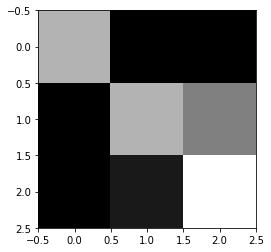

In [17]:
cm = sm.confusion_matrix(y_test, predictions)
print(cm)
plt.imshow(cm, cmap='gray')

In [13]:
print(sm.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.58      0.70        12
           2       0.67      0.91      0.77        11

    accuracy                           0.80        30
   macro avg       0.85      0.83      0.82        30
weighted avg       0.83      0.80      0.80        30

